**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

# Preliminary operations

In [1]:
# import main libraries
%matplotlib inline

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# get th path of lore algorithm modules
sys.path.append('/content/drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Explainable AI/CODICE LEZIONI/lore/')

In [4]:
# import modules from lore
from util import record2str, neuclidean
from datamanager import prepare_adult_dataset, prepare_dataset

# Data Preparation

In [5]:

class_name = 'churn'
directory = "/content/drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Explainable AI/CODICE LEZIONI/"

# import data
df = pd.read_csv(
    directory + "churn.csv", 
    skipinitialspace=True, 
    na_values='?', 
    keep_default_na=True
)

# remove column "phone number"
columns2remove = ['phone number']
df.drop(columns2remove, inplace=True, axis=1)

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# the prepare_dataset function extracts the following variables:
# - dataframe
# - feature names
# - class values (all possibile classes)
# - name of numeric columns
# - rdf: a dataframe with just real feature columnns
# - real feature names
# - features map (non so bene cosa sia)

res = prepare_dataset(df, class_name)

# use the prepare_dataset function from lore
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res

df.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state=VT,state=WA,state=WI,state=WV,state=WY,international plan=no,international plan=yes,voice mail plan=no,voice mail plan=yes,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,1,0,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,1,0,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,1,0,1,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,1,1,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,1,1,0,0


In [7]:
type(class_values[0])

numpy.bool_

In [8]:
# import train- and test-set splitter and cross validation score
from sklearn.model_selection import train_test_split, cross_val_score 

# import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [9]:
# set test-set size
test_size = 0.30
random_state = 0

# split train- and test-set with all feature names
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_names].values, 
    df[class_name].values, 
    test_size=test_size,
    random_state=random_state, 
    stratify=df[class_name].values
)

# splot train- and test-set with just real feature names
_, K, _, _ = train_test_split(
    rdf[real_feature_names].values, 
    rdf[class_name].values, 
    test_size=test_size,
    random_state=random_state, 
    stratify=df[class_name].values
)

# Classification

In [10]:
# import Random-Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
# set Random-Forest
bb = RandomForestClassifier(
    n_estimators=20, 
    random_state=42
)

# fit Random-Forest with the all features dataset
bb.fit(
    X_train, 
    y_train
)

RandomForestClassifier(n_estimators=20, random_state=42)

In [12]:
# def a predict fuction
def bb_predict(X):
    return bb.predict(X)

# def a predict proba function
def bb_predict_proba(X):
    return bb.predict_proba(X)

In [13]:
# get predictions from Random-Forest
y_pred = bb_predict(X_test)

# print accuracy and F1-score
print('Accuracy %.3f' % accuracy_score(y_test, y_pred))
print('F1-measure %.3f' % f1_score(y_test, y_pred))

Accuracy 0.943
F1-measure 0.771


# Explanation

## Global Explanation

https://oracle.github.io/Skater/index.html

In [14]:
#!pip install -U skater

In [15]:
#from skater.model import InMemoryModel
#from skater.core.explanations import Interpretation

#from skater.core.global_interpretation.partial_dependence import PartialDependence

In [16]:
#interpreter = Interpretation()
#interpreter.load_data(X_train, feature_names=feature_names)

In [17]:
#model = InMemoryModel(bb_predict_proba, examples=X_test)
#interpreter.partial_dependence.plot_partial_dependence([feature_names[0], feature_names[1]], 
#                                                       model, n_samples=100, n_jobs=1)
#plt.show()

In [18]:
#from skater.model import InMemoryModel
#from skater.core.explanations import Interpretation

In [19]:
#interpreter = Interpretation(X_train, feature_names=feature_names)
#model_inst = InMemoryModel(bb_predict_proba, examples=X_test) #, unique_values=class_values,
#                           #feature_names=feature_names, target_names=class_values)

In [20]:
#surrogate_explainer = interpreter.tree_surrogate(oracle=model_inst, seed=42)
#surrogate_explainer.fit(X_test, y_test, use_oracle=True, prune='post', scorer_type='default')
#surrogate_explainer.plot_global_decisions(colors=['coral', 'lightsteelblue','darkkhaki'],
#                                         file_name='simple_tree_pre.png')
#show_in_notebook('simple_tree_pre.png', width=400, height=300)

In [21]:
#from skater.core.global_interpretation.tree_surrogate import TreeSurrogate

In [22]:
# import Decision-Tree classifier
from sklearn.tree import DecisionTreeClassifier
# import the plot-tree util from sklearn
from sklearn.tree import plot_tree

In [23]:
# get predictions from Random-Forest, but from training-set
y_pred_train = bb_predict(X_train)

In [24]:
# set the Decision-Tree Classifier
explainer = DecisionTreeClassifier(max_depth=4)
# fit the Decision-Tree Classifier with the Random-Forest predictions
explainer.fit(X_train, y_pred_train)

DecisionTreeClassifier(max_depth=4)

In [25]:
# import pydotplus library
import pydotplus
# import the entire tree module from sklearn (e.g.: DecisionTreeClassifier is inside the tree module)
from sklearn import tree
from IPython.display import Image

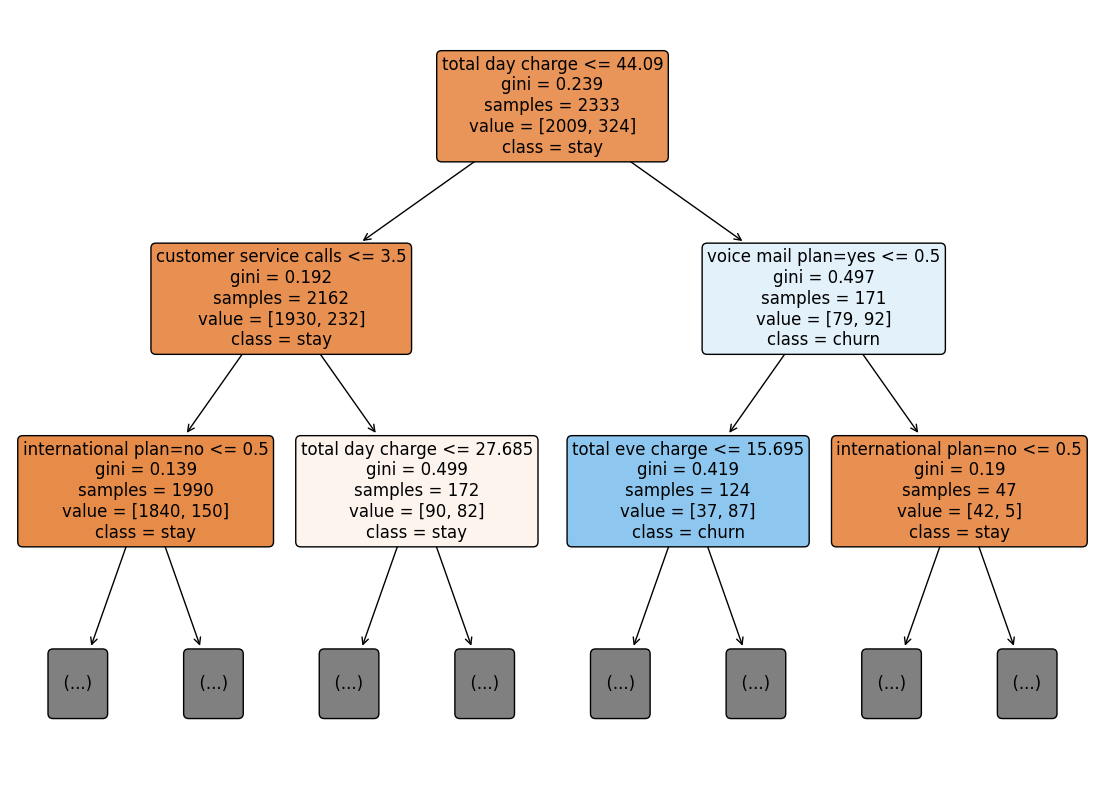

In [26]:
# set figure size
plt.figure(figsize=(14, 10))

# plot the tree
plot_tree(
    explainer, 
    feature_names=feature_names, 
    class_names=['stay', 'churn'], 
    filled=True, 
    rounded=True,
    fontsize=12,
    max_depth=2
)

plt.show()

## Local Explanations

### Select a record to explain

In [27]:
# i2e = instance to explain
# the instance to explain is the n° 22
i2e = 22

# get the record from the test-set
x = X_test[i2e]

x

array([ 49.  , 415.  ,   0.  , 266.3 ,  90.  ,  45.27, 207.8 , 117.  ,
        17.66, 205.  ,  98.  ,   9.23,  14.  ,   2.  ,   3.78,   2.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ])

In [28]:
# use the record2str function to get a vocabulary of feature names with respective feature values of the i2e
record2str(x, feature_names, numeric_columns)

'{ account length = 49.0, area code = 415.0, number vmail messages = 0.0, total day minutes = 266.3, total day calls = 90.0, total day charge = 45.27, total eve minutes = 207.8, total eve calls = 117.0, total eve charge = 17.66, total night minutes = 205.0, total night calls = 98.0, total night charge = 9.23, total intl minutes = 14.0, total intl calls = 2.0, total intl charge = 3.78, customer service calls = 2.0, state = UT, international plan = no, voice mail plan = no }'

In [29]:
# get the first prediction
bb_outcome = bb_predict(x.reshape(1, -1))[0]
# get the class_value (the string version) of the first prediction
bb_outcome_str = class_values[bb_outcome]

print('bb(x) = { %s }' % bb_outcome_str)
print('')

bb(x) = { True }



In [30]:
bb_outcome

1

# LIME

https://github.com/marcotcr/lime

In [31]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=e903f67ebcbccb3aad41cf319da3c92db308a05affc81cb87e86f705dddc4c06
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [32]:
from lime.lime_tabular import LimeTabularExplainer

In [33]:
# set LIME explainer
lime_explainer = LimeTabularExplainer(
    X_test, # dataset
    feature_names=feature_names, # feature names
    class_names=[str(v) for v in class_values], # class names (possible class values)
    discretize_continuous=False
)

In [34]:
# explain the x instance (defined before with i2e)
exp = lime_explainer.explain_instance(
    x, 
    bb_predict_proba
)

In [35]:
exp.local_exp

{1: [(15, 0.031328580449108696),
  (5, 0.0250612350334037),
  (3, 0.02457851604219663),
  (68, 0.02345888089471575),
  (13, -0.017808682425892276),
  (67, -0.011633927783072446),
  (70, -0.010712641207278729),
  (60, 0.00744024608846964),
  (14, 0.0057926369016755505),
  (12, 0.004783422312833342)]}

In [36]:
exp.show_in_notebook()

# SHAP

In [37]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.4 MB/s eta 0:00:00


In [38]:
# import SHAP algorithm
import shap

# use initjs (non so cosa fa)
shap.initjs()

In [39]:
X_test.shape

(1000, 71)

In [40]:
f = lambda x: bb_predict_proba(x)[:, 1]

# get the median of each feature of test-set
med = np.median(
    X_test, 
    axis=0

# reshape the median matrix with this shape (1, n. of features)
).reshape(
    (1, X_test.shape[1])

)

shap_explainer = shap.KernelExplainer(f, med)

In [41]:
# get shap values of the instance x (i2e)
shap_values_single = shap_explainer.shap_values(x, nsamples=1000)
shap_values_single

array([ 0.00505844,  0.        ,  0.        ,  0.43585232, -0.02057765,
        0.3548621 ,  0.00398747, -0.01440693,  0.00268875,  0.00078148,
        0.        ,  0.00131593,  0.02097025, -0.02855142,  0.03659695,
       -0.00740588,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00882819,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [42]:
# google colab needs shap.initjs() in each cell where there is a visualization
shap.initjs()

shap.force_plot(
    shap_explainer.expected_value, # expected value of the record
    shap_values_single, # shap values of the record
    features=x, # fature values (i.e., the record)
    feature_names=feature_names # feature names
)

In [43]:
shap_values = shap_explainer.shap_values(
    X_test[0:100,:], 
    nsamples=1000
)

  0%|          | 0/100 [00:00<?, ?it/s]

In [44]:
# google colab needs shap.initjs() in each cell where there is a visualization
shap.initjs()

shap.force_plot(
    shap_explainer.expected_value, 
    shap_values, 
    X_test[0:100,:], 
    feature_names=feature_names
)

# LORE

In [45]:
!pip install bitarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 5.2 MB/s eta 0:00:00


In [46]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 4.1 MB/s eta 0:00:00


In [47]:
from lorem import LOREM

In [48]:
class_name

'churn'

In [49]:
# set the LORE explainer
lore_explainer = LOREM(
    K, # test-set with just real features
    bb_predict, # predictions of Random-Forest
    feature_names, # names of all features
    class_name, # name of class column
    class_values, # the possibile values of the class
    numeric_columns, # numeric column names
    features_map, # feature map
    neigh_type='geneticp', # boh
    categorical_use_prob=True, 
    continuous_fun_estimation=False, 
    size=1000, 
    ocr=0.1, 
    random_state=42, 
    ngen=10, 
    bb_predict_proba=bb_predict_proba, 
    verbose=True
)

calculating feature values


In [50]:
# get the explanation of a record
exp = lore_explainer.explain_instance(
    x, # record to explain (i2e)
    samples=300, # n. of samples
    use_weights=True, # weighted method
    metric=neuclidean # metric
)

generating neighborhood - geneticp
gen	nevals	avg     	min     	max     
0  	150   	0.496654	0.496654	0.496654
1  	131   	0.696323	0.496654	0.993207
2  	134   	0.852242	0.496654	0.993214
3  	126   	0.911261	0.552249	0.993214
4  	131   	0.920091	0.531453	0.993214
5  	127   	0.938976	0.551935	0.993214
6  	124   	0.933553	0.531633	0.993264
7  	125   	0.935763	0.531653	0.99324 
8  	137   	0.925204	0.551668	0.99327 
9  	124   	0.935196	0.531499	0.99327 
10 	118   	0.947229	0.531538	0.99327 
gen	nevals	avg	min	max
0  	150   	0.5	0.5	0.5
1  	125   	0.584347	0.499254	0.961106
2  	131   	0.725675	0.499719	0.961106
3  	127   	0.846991	0.504654	0.961076
4  	131   	0.894284	0.504858	0.961019
5  	132   	0.908944	0.505002	0.96114 
6  	133   	0.908713	0.537226	0.961131
7  	128   	0.917474	0.504742	0.961141
8  	127   	0.925317	0.509923	0.961187
9  	126   	0.912074	0.519618	0.961101
10 	121   	0.908423	0.519524	0.961121
synthetic neighborhood class counts {False: 244, True: 116}
learning local decision

In [51]:
print(exp)

r = { total day minutes > 247.46, total day charge > 38.10, total eve minutes > 172.14, total night charge > 4.61, account length > 47.50, total intl minutes > 9.29 } --> { churn: True }
c = { { total eve minutes <= 172.14 } }


In [52]:
x1 = x.copy()
x1[feature_names.index('total eve minutes')] = 170

print('x1 = %s' % record2str(x1, feature_names, numeric_columns))
print('')

x1 = { account length = 49.0, area code = 415.0, number vmail messages = 0.0, total day minutes = 266.3, total day calls = 90.0, total day charge = 45.27, total eve minutes = 170.0, total eve calls = 117.0, total eve charge = 17.66, total night minutes = 205.0, total night calls = 98.0, total night charge = 9.23, total intl minutes = 14.0, total intl calls = 2.0, total intl charge = 3.78, customer service calls = 2.0, state = UT, international plan = no, voice mail plan = no }



In [53]:
bb_outcome = bb_predict(x1.reshape(1, -1))[0]
bb_outcome_str = class_values[bb_outcome]

print('bb(x) = { %s }' % bb_outcome_str)
print('')

bb(x) = { False }



In [54]:
from sklearn.tree import plot_tree

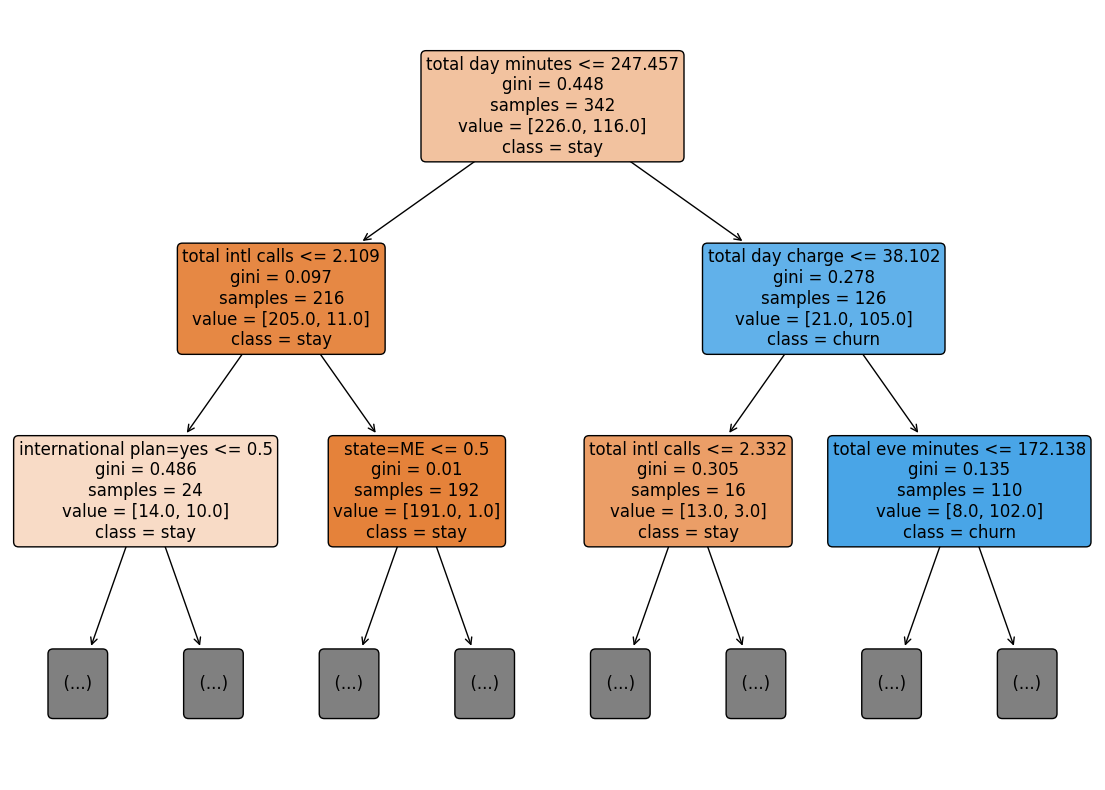

In [55]:
plt.figure(figsize=(14, 10))
plot_tree(exp.dt, 
          feature_names=feature_names, 
          class_names=['stay', 'churn'], 
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

# DALEX

https://dalex.drwhy.ai/python-dalex-titanic.html

https://github.com/ModelOriented/DALEX

## Counterfactual Explanations

In [57]:
!pip install fat-forensics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.1/212.1 kB 4.2 MB/s eta 0:00:00


In [64]:
import fatf.transparency.predictions.counterfactuals as fatf_cf

In [68]:
X_test.shape

(1000, 71)

In [65]:
# Create a Counterfactual Explainer
cf_explainer = fatf_cf.CounterfactualExplainer(
    model=bb,
    dataset=X_test,
    categorical_indices=[],
    default_numerical_step_size=1,
    max_counterfactual_length=1
)

In [66]:
x1.shape

(71,)

In [67]:
dp_1_cf_tuple = cf_explainer.explain_instance(x1)
dp_1_cfs, dp_1_cfs_distances, dp_1_cfs_predictions = dp_1_cf_tuple

In [61]:
dp_1_cfs

array([[ 49.  , 415.  ,   0.  , 266.3 ,  90.  ,  45.27, 170.  , 117.  ,
         17.66, 205.  ,  98.  ,   9.23,  14.  ,   2.  ,   3.78,   2.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ],
       [ 49.  , 415.  ,   0.  , 266.3 ,  90.  ,  45.27, 170.  , 117.  ,
         17.66, 205.  ,  98.  ,   9.23,  14.  ,   2.  ,   3.78,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,

In [62]:
dp_1_cfs_text = fatf_cf.textualise_counterfactuals(
    x1,
    dp_1_cfs,
    instance_class=bb_outcome,
    counterfactuals_distances=dp_1_cfs_distances,
    counterfactuals_predictions=dp_1_cfs_predictions)
print(dp_1_cfs_text)

Instance (of class *0*):
[ 49.   415.     0.   266.3   90.    45.27 170.   117.    17.66 205.
  98.     9.23  14.     2.     3.78   2.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   1.     0.     0.     0.     0.     0.     0.     1.     0.     1.
   0.  ]

Feature names: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]

Counterfactual instance (of class *1*):
Distance: 1.0
    feature *67*: *1.0* -> *0.0*

Counterfactual instance (of class *1*):
Distance: 2.0
    feature *15*: *2.0* -> *0.0*

Counterfactual 

In [63]:
x1.shape

(71,)